<h1>Gráficas covidatos</h1>

Plenamente en este notebook se encuentran algunas gráficas que modelan los datos descargados desde una página de datos abiertos en el gobierno:<br> <a href="https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data">el hipervínculo aquí</a>
<br> 
y de Bogotá <a href="https://datosabiertos.bogota.gov.co/dataset/numero-de-casos-confirmados-por-el-laboratorio-de-covid-19-bogota-d-c">el hipervínculo </a><br>

Básicamente, en este notebook se contiene gráficas de Colombia: <br>

<ol>
    <li>Gráfica de torta que modela el número de contagios con respecto al sexo en el país</li>
    <li>Gráfica de barras conjunta que modela los primeros diez departamentos con mayor número de contagios</li>
    <li>Gráfica de barras de contagios con respecto a un rango de edades separados en 20 años</li>
    <li>Gráfica del número total de recuperados, activos y fallecidos</li>
</ol>
<br>
Y las gráficas de bogotá
<ol>
    <li>Gráfica de barras conjunta que modela las primeras diez localidades con mayor número de contagios</li>
    <li>Gráfica de barras de contagios con respecto a un rango de edades separados en 20 años</li>
    <li>Gráfica del número total de recuperados, activos y fallecidos</li>
    <li>Mapa de calor del número de contagios en Bogotá</li>
</ol>
<br>
Los datos mostrados están actualizados a la fecha del 31 de octubre del 2020

In [71]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds
from main import tomarConexión
conexion=tomarConexión()
cursor=conexion.cursor()

Connected to MySQL Server version  8.0.21
You're connected to database:  ('datoscovid',)


<h1>Colombia</h1>

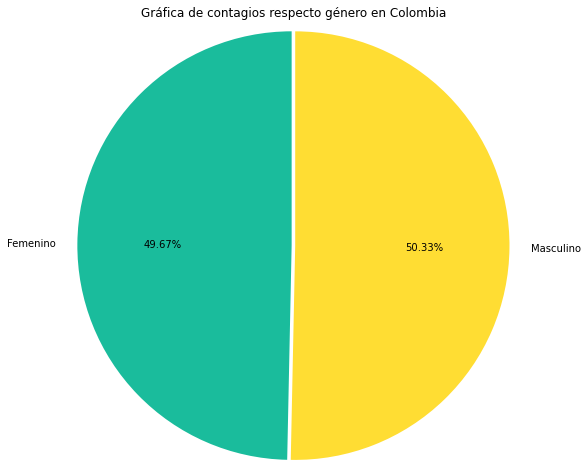

In [36]:
paleta=['#1abc9c','#ffdd33']
cursor=conexion.cursor()
#grafica N1 genero colombia
cursor.execute('select sexo,count(*) as cantidad from datos group by sexo;')
cantidad=[]
for fila in cursor:
    cantidad.append(fila[1])
sexo=['Femenino','Masculino']
colores=[paleta[0],paleta[1]]
plt.figure(figsize=(8,10))
plt.title("Gráfica de contagios respecto género en Colombia")
plt.pie(cantidad, labels=sexo, colors=colores, startangle=90, explode=(0.01,0.01), radius=1.2, autopct='%1.2f%%' )
#plt.show()
plt.savefig('Circular.png')

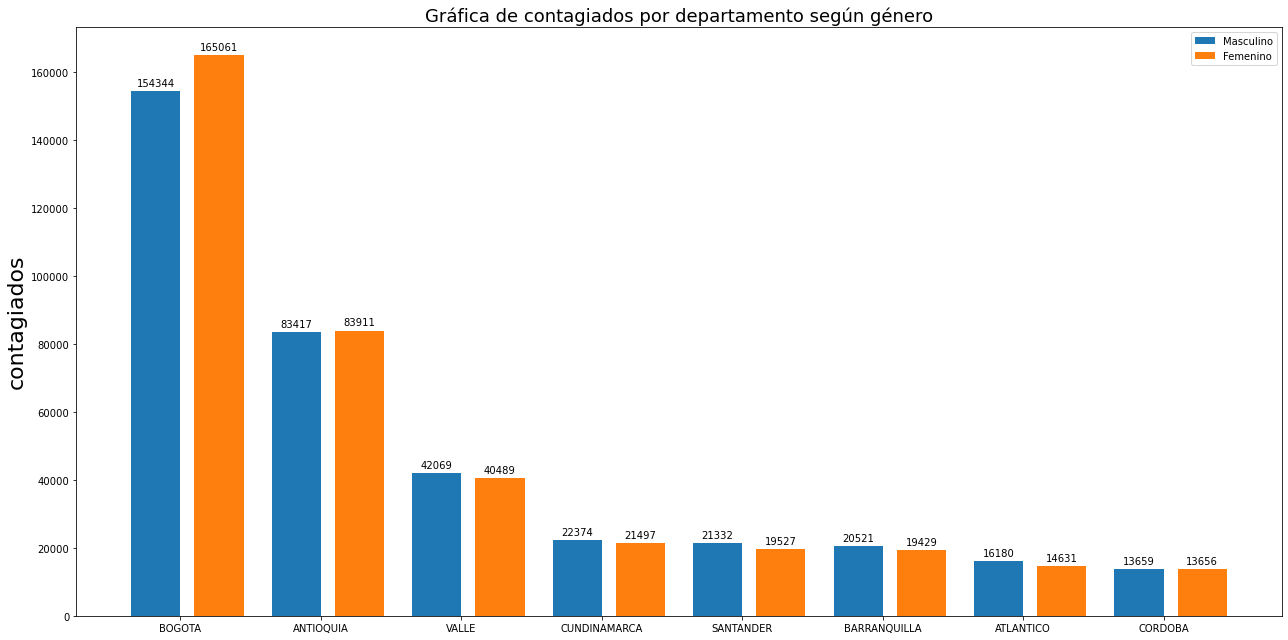

In [37]:
cursor.execute('select departamento, count(*) as contagios from datos group by departamento order by contagios desc, departamento limit 8;')
departamentos=[]
for fila in cursor:
    departamentos.append(fila[0])
cursor.execute('select departamento, sexo, count(*) as contagios from datos group by sexo, departamento order by contagios desc, departamento limit 16;')
masculino=[]
femenino=[]
for fila in cursor:
    if fila[1]=='M':
        masculino.append(fila[2])
    else:
        femenino.append(fila[2])
x=np.arange(len(departamentos))
#tamaño barra
width=0.35
#barra hombre
fig, ax = plt.subplots(figsize=(18,9))
rectaMasc=ax.bar(x-width/2,masculino,width,label='Masculino')
#barra femenino
rectafem=ax.bar(x+width/2+0.1,femenino,width,label='Femenino')
#etiquetas
ax.set_ylabel('contagiados',fontsize=22)
ax.set_title('Gráfica de contagiados por departamento según género',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(departamentos)
#leyenda
ax.legend()
#funcion para agregar etiqueta a cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
#etiqueta a cada barra
autolabel(rectaMasc)
autolabel(rectafem)
fig.tight_layout()

plt.savefig('doble_barra.png')


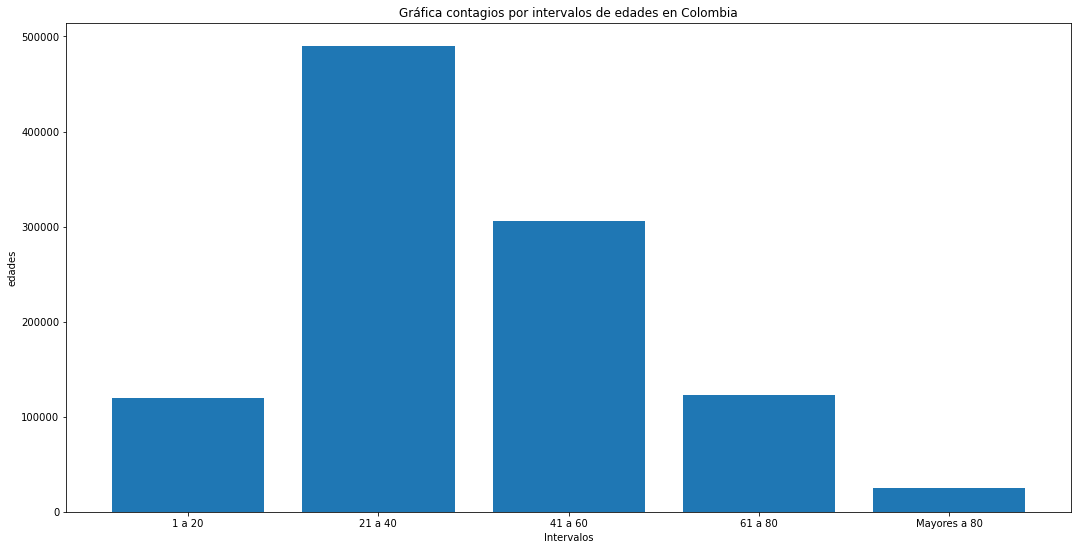

In [38]:
cursor = conexion.cursor(buffered=True)
cursor.execute('select edad, count(*) as contagiados from datos group by edad;')
edades=['1 a 20','21 a 40','41 a 60','61 a 80','Mayores a 80']

valores=[]

cursor.execute('select count(*) as contagiados from datos where edad between 1 and 20;')
for fila in cursor:
    valores.append(fila[0])

cursor.execute('select count(*) as contagiados from datos where edad between 21 and 40;')
for fila in cursor:
    valores.append(fila[0])

cursor.execute('select count(*) as contagiados from datos where edad between 41 and 60;')
for fila in cursor:
    valores.append(fila[0])

cursor.execute('select count(*) as contagiados from datos where edad between 61 and 80;')
for fila in cursor:
    valores.append(fila[0])   

cursor.execute('select count(*) as contagiados from datos where edad > 80;')
for fila in cursor:
    valores.append(fila[0])
#plt.figure(figsize=(10,6))
fig, ax=plt.subplots(figsize=(18,9))
#Etiqueta en el eje y
ax.set_ylabel('edades')
#Etiqueta en el eje x
ax.set_xlabel('Intervalos')
#Titulo
ax.set_title('Gráfica contagios por intervalos de edades en Colombia')

plt.bar(edades, valores)

#plt.show()
plt.savefig('barras_edad.png')

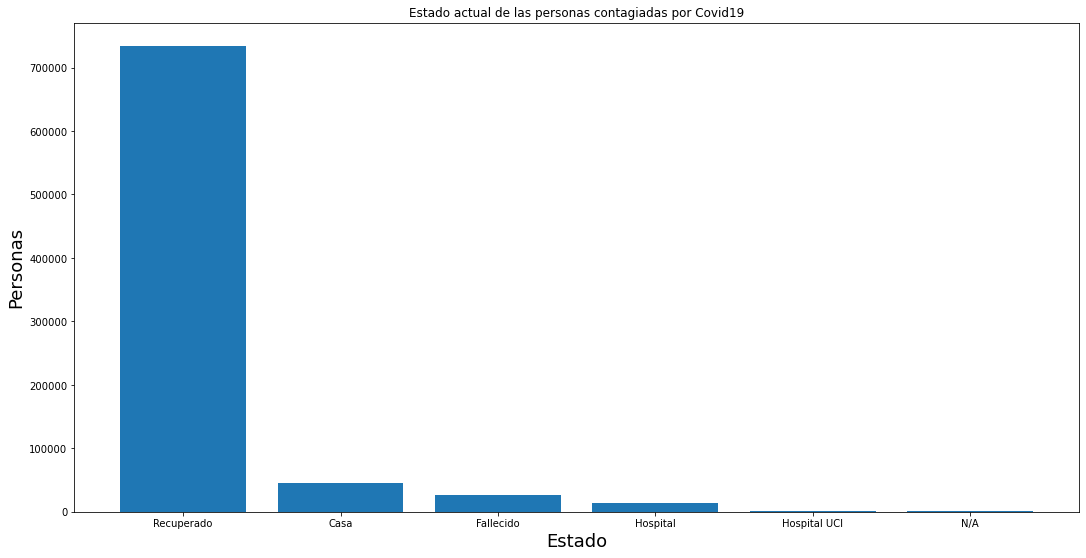

In [5]:
cursor=conexion.cursor()
cursor.execute('select atencion, count(*) as personas from datos group by atencion order by personas desc;')
atencion=[]
cantidad=[]
for fila in cursor:
    atencion.append(fila[0])
    cantidad.append(fila[1])

fig, ax = plt.subplots(figsize=(18,9))
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Personas',fontsize=18)
#Colocamos una etiqueta en el eje X
ax.set_xlabel('Estado',fontsize=18)
#Título
ax.set_title('Estado actual de las personas contagiadas por Covid19')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(atencion, cantidad)
#Finalmente mostramos la grafica con el metodo show()
#plt.show()
plt.savefig('barras_estado.png')
conexion.close()

<h1> Bogotá </h1>


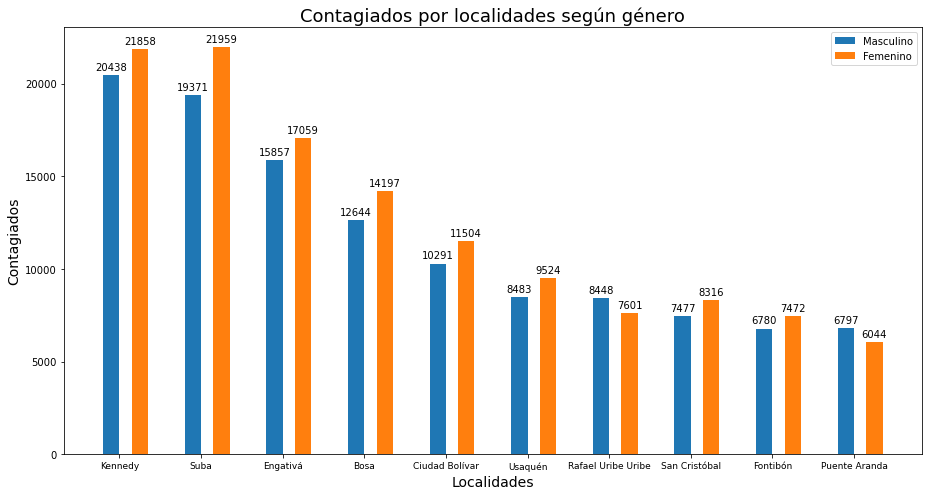

In [3]:
cursor.execute('Select localidad_asis,count(*) as contagios from datosbogota where localidad_asis <> "Sin dato" and localidad_asis <> "Fuera de Bogotá" group by localidad_asis order by contagios desc limit 10;')
localidades=[]
for fila in cursor:
    localidades.append(fila[0])

#Femenino
cursor.execute('Select localidad_asis,count(*) as contagios from datosbogota where sexo = "F" group by localidad_asis order by contagios desc;')
femenino={}
for fila in cursor:
    femenino[fila[0]]=fila[1]

#Masculino
cursor.execute('Select localidad_asis,count(*) as contagios from datosbogota where sexo = "M" group by localidad_asis order by contagios desc;')
masculino={}
for fila in cursor:
    masculino[fila[0]]=fila[1]

#GÉNERO ORGANIZADO
masculino_organizado=[]
femenino_organizado=[]
for localidad in localidades:
    masculino_organizado.append(masculino[localidad])
    femenino_organizado.append(femenino[localidad])

width=0.2
#Gráfica
x=np.arange(len(localidades))
#barra hombre
fig, ax = plt.subplots(figsize=(13,7))
rectaMasc=ax.bar(x-width/2,masculino_organizado,width,label='Masculino')
#barra femenino
rectafem=ax.bar(x+width/2+0.15,femenino_organizado,width,label='Femenino')
#etiquetas
ax.set_ylabel('Contagiados',fontsize=14)
ax.set_title('Contagiados por localidades según género',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(localidades,fontsize=9)
ax.set_xlabel('Localidades',fontsize=14)
#leyenda
ax.legend()
#funcion para agregar etiqueta a cada barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
#etiqueta a cada barra
autolabel(rectaMasc)
autolabel(rectafem)
fig.tight_layout()
plt.savefig('doble_barra.png')
plt.show()

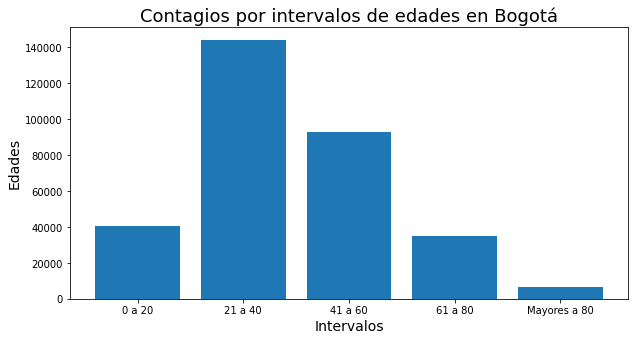

In [9]:
cursor = conexion.cursor(buffered=True)
cursor.execute('select edad, count(*) as contagiados from datosbogota group by edad;')
edades=['0 a 20','21 a 40','41 a 60','61 a 80','Mayores a 80']

valores=[]

cursor.execute('select count(*) as contagiados from datosbogota where edad between 0 and 20;')
for fila in cursor:
    valores.append(fila[0])

cursor.execute('select count(*) as contagiados from datosbogota where edad between 21 and 40;')
for fila in cursor:
    valores.append(fila[0])

cursor.execute('select count(*) as contagiados from datosbogota where edad between 41 and 60;')
for fila in cursor:
    valores.append(fila[0])

cursor.execute('select count(*) as contagiados from datosbogota where edad between 61 and 80;')
for fila in cursor:
    valores.append(fila[0])   

cursor.execute('select count(*) as contagiados from datosbogota where edad > 80;')
for fila in cursor:
    valores.append(fila[0])

fig, ax=plt.subplots(figsize=(10,5))
#Etiqueta en el eje y
ax.set_ylabel('Edades',fontsize=14)
#Etiqueta en el eje x
ax.set_xlabel('Intervalos', fontsize=14)
#Titulo
ax.set_title('Contagios por intervalos de edades en Bogotá',fontsize=18)

plt.bar(edades, valores)
plt.savefig('barras_edad.png')
plt.show()


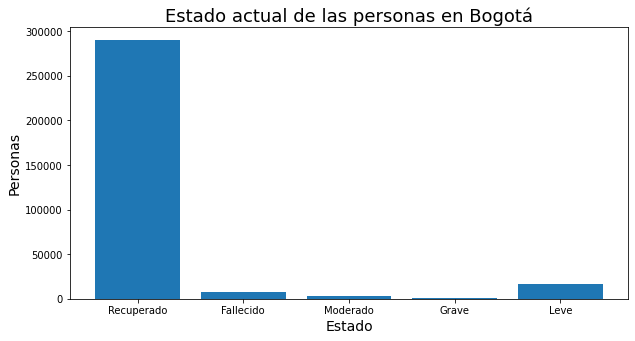

In [12]:
cursor.execute('select estado, count(*) as contagios from datosbogota where estado <> "Fallecido No aplica No causa Directa" group by estado;')
atencion=[]
cantidad=[]
for fila in cursor:
    atencion.append(fila[0])
    cantidad.append(fila[1])
fig, ax = plt.subplots(figsize=(10,5))

#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Personas',fontsize=14)
#Colocamos una etiqueta en el eje X
ax.set_xlabel('Estado',fontsize=14)
#Título
ax.set_title('Estado actual de las personas en Bogotá',fontsize=18)
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(atencion, cantidad)
plt.savefig('barras_estado.png')
#Finalmente mostramos la grafica con el metodo show()
plt.show()



In [4]:
# use import geocoder

# get location data for large cities (latitude and longitude)
bosa = geocoder.osm('Localidad Bosa, Bogotá, Bogotá Distrito Capital')
barrios_unidos = geocoder.osm('Localidad Barrios Unidos, Bogotá, Bogotá Distrito Capital')
usaquen = geocoder.osm('Localidad Usaquén, Bogotá, Bogotá Distrito Capital')
chapinero = geocoder.osm('Localidad Chapinero, Bogotá, Bogotá Distrito Capital')
santa_fe = geocoder.osm('Localidad Santa Fe, Bogotá, Bogotá Distrito Capital')
san_cristobal = geocoder.osm('Localidad San Cristobal, Bogotá, Bogotá Distrito Capital')
fontibon = geocoder.osm('Localidad Fontibon, Bogotá, Bogotá Distrito Capital')
engativa = geocoder.osm('Localidad Engativa, Bogotá, Bogotá Distrito Capital')
kennedy = geocoder.osm('Localidad Kennedy, Bogotá, Bogotá Distrito Capital')
suba = geocoder.osm('Localidad Suba, Bogotá, Bogotá Distrito Capital')
teusaquillo = geocoder.osm('Localidad Teusaquillo, Bogotá, Bogotá Distrito Capital')
la_candelaria = geocoder.osm('Localidad La candelaria, Bogotá, Bogotá Distrito Capital')
martires = geocoder.osm('Localidad Martires, Bogotá, Bogotá Distrito Capital')
puente_aranda = geocoder.osm('Localidad Puente aranda, Bogotá, Bogotá Distrito Capital')
antonio_nariño = geocoder.osm('Localidad Antonio nariño, Bogotá, Bogotá Distrito Capital')
ciudad_bolivar = geocoder.osm('Localidad Ciudad Bolivar, Bogotá, Bogotá Distrito Capital')
usme = geocoder.osm('Localidad Usme, Bogotá, Bogotá Distrito Capital')
sumapaz = geocoder.osm('Localidad Sumapaz, Bogotá, Bogotá Distrito Capital')
rafael_uribe_uribe = geocoder.osm('Localidad Rafael Uribe Uribe, Bogotá, Bogotá Distrito Capital')
tunjuelito = geocoder.osm('Localidad Tunjuelito, Bogotá, Bogotá Distrito Capital')

#Consulta de datos Bogotá
cursor.execute('select localidad_asis,count(*) as contagios from datosbogota where localidad_asis <> "Sin dato" group by localidad_asis order by contagios desc;')
for fila in cursor:
    if fila[0]=="Bosa":
          bosa_latlng = [bosa.lat, bosa.lng, fila[1]/100]
    elif fila[0]=="Barrios Unidos":
          barrios_unidos_latlng = [barrios_unidos.lat, barrios_unidos.lng, fila[1]/100]
    elif fila[0]=="Usaquén":
          usaquen_latlng = [usaquen.lat, usaquen.lng, fila[1]/100]
    elif fila[0]=="Chapinero":
          chapinero_latlng = [chapinero.lat, chapinero.lng, fila[1]/100]
    elif fila[0]=="Santa Fe":  
          santa_fe_latlng = [santa_fe.lat, santa_fe.lng, fila[1]/100]
    elif fila[0]=="San Cristóbal":
          san_cristobal_latlng = [san_cristobal.lat, san_cristobal.lng, fila[1]/100]
    elif fila[0]=="Fontibón":        
          fontibon_latlng = [fontibon.lat, fontibon.lng, fila[1]/100]
    elif fila[0]=="Engativá":
          engativa_latlng = [engativa.lat, engativa.lng, fila[1]/100]
    elif fila[0]=="Kennedy":
          kennedy_latlng = [kennedy.lat, kennedy.lng, fila[1]/100]
    elif fila[0]=="Suba":        
          suba_latlng = [suba.lat, suba.lng, fila[1]/100]
    elif fila[0]=="Teusaquillo":
          teusaquillo_latlng = [teusaquillo.lat, teusaquillo.lng, fila[1]/100]
    elif fila[0]=="La Candelaria":        
          la_candelaria_latlng = [la_candelaria.lat, la_candelaria.lng, fila[1]/100]
    elif fila[0]=="Los Mártires":
          martires_latlng = [martires.lat, martires.lng, fila[1]/100]
    elif fila[0]=="Puente Aranda":
          puente_aranda_latlng = [puente_aranda.lat, puente_aranda.lng, fila[1]/100]
    elif fila[0]=="Antonio Nariño":
          antonio_nariño_latlng = [antonio_nariño.lat, antonio_nariño.lng, fila[1]/100]
    elif fila[0]=="Ciudad Bolívar":
          ciudad_bolivar_latlng = [ciudad_bolivar.lat, ciudad_bolivar.lng, fila[1]/100]
    elif fila[0]=="Usme":
          usme_latlng = [usme.lat, usme.lng, fila[1]/100]
    #elif fila[0]=="Sumapaz":        
     #     sumapaz_latlng = [sumapaz.lat,sumapaz.lng, fila[1]/100]
    elif fila[0]=="Rafael Uribe Uribe":
          rafael_uribe_uribe_latlng = [rafael_uribe_uribe.lat,rafael_uribe_uribe.lng, fila[1]/100]  
    elif fila[0]=="Tunjuelito":
          tunjuelito_latlng = [tunjuelito.lat,tunjuelito.lng, fila[1]/100]  
# create list of cities with latitude, longitude, intensity
large_cities = [bosa_latlng, barrios_unidos_latlng, usaquen_latlng, chapinero_latlng, santa_fe_latlng, san_cristobal_latlng, fontibon_latlng,
               engativa_latlng,kennedy_latlng,  suba_latlng, teusaquillo_latlng, la_candelaria_latlng, martires_latlng, 
               puente_aranda_latlng, antonio_nariño_latlng, ciudad_bolivar_latlng, usme_latlng,rafael_uribe_uribe_latlng, tunjuelito_latlng]

map_heatmap = folium.Map([4.5988888, -74.08083], tiles='CartoDB Positron', zoom_start=10)



plugins.HeatMap(large_cities).add_to(map_heatmap)
geojson_layer = folium.GeoJson("poligonos-localidades.geojson",name='geojson').add_to(map_heatmap)
map_heatmap

In [76]:
from pandas import DataFrame
# heat map over time
sql= 'select localidad_asis,month(fecha_diagnostico) as mes,count(*) as contagios from datosbogota  where month(fecha_diagnostico) between 3 and month(curdate()) and localidad_asis<>"Sin dato" and localidad_asis<>"Fuera de Bogotá" group by localidad_asis,month(fecha_diagnostico) order by localidad_asis,mes;'
# data
cursor.execute(sql)
df = DataFrame(cursor.fetchall())
g=df.groupby(1)
marzo=g.get_group(3)
abril=g.get_group(4)
mayo=g.get_group(5)
junio=g.get_group(6)
julio=g.get_group(7)
agosto=g.get_group(8)
septiembre=g.get_group(9)
octubre=g.get_group(10)
meses =[marzo,abril,mayo,junio,julio,agosto,septiembre,octubre]

data=[]
for mes in meses:
    data_mes=[]
    for indice_fila, fila in mes.iterrows():
        datos_localidad=geocoder.osm('Localidad '+str(fila[0])+', Bogotá, Bogotá Distrito Capital')
        data_mes.append([datos_localidad.lat,datos_localidad.lng,fila[2]/1000])
    data.append(data_mes)
# take note of data format needed for heat map with time (using plugins.HeatMapWithTime?)

heatmap_time_data = data
# dates
heatmap_time_dates = [d.strftime('%Y-%m-%d') for d in pd.date_range('20200301', periods=len(heatmap_time_data),freq='M')]

# map
map_heatmap_time = folium.Map([4.5988888, -74.08083], tiles='CartoDB Dark_Matter', zoom_start=8)

# heatmap plugin
heatmap_time_plugin = plugins.HeatMapWithTime(heatmap_time_data, index=heatmap_time_dates)

# add heatmap plugin to map
heatmap_time_plugin.add_to(map_heatmap_time)

geojson_layer = folium.GeoJson("poligonos-localidades.geojson",name='geojson').add_to(map_heatmap_time)

# display map
map_heatmap_time